In [3]:
from textblob.classifiers import NaiveBayesClassifier
import re
import nltk
import pandas as pd
import seaborn as sns

## Loading the IMDB review dataset

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

## Data Pre-Processing

In [6]:
def pre_process(text):
    
    result = re.sub('<[^>]*>', '', text) #remove_tags
    result = re.sub('https://.*','',result) #remove URLs
    result = re.sub('[^a-zA-Z]', ' ',result) #remove non-alphanumeric characters
    result = re.sub('  ',' ', result)
    result = result.lower()
#     print(result)
    return result

In [7]:
df['review'] = df['review'].apply(lambda x: pre_process(x))

### Removing Stopwords

In [8]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# print ("stop_words", stop_words)
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
pd.set_option('max_colwidth', None) # show full width of showing cols
display(df)

,review,sentiment
0,one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side,positive
1,wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends,positive
3,basically family little boy jake thinks zombie closet parents fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots well playing parents descent dialogs shots jake ignore,negative
4,petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work,positive
...,...,...
49995,thought movie right good job creative original first expecting whole lotta fun think like comes dvd going pay money proudly every last cent sharon stone great always even movie horrible catwoman movie one movies underrated lifetime probably become classic like yrs wait classic watch enjo

## Plotting the original dataset

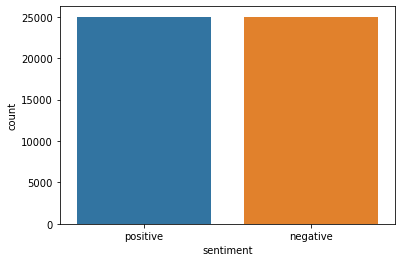

In [10]:
sns.countplot(df['sentiment'])

## Slicing Training data with 2000 samples

In [11]:
train_data = df.apply(tuple, axis=1).tolist()[:2000]

In [12]:
len(train_data)

2000

## Slicing Testing data with 100 samples

In [21]:
test_data = df.apply(tuple,axis=1).tolist()[0:200:2]

In [22]:
len(test_data)

100

In [23]:
train_data_df = pd.DataFrame(train_data, columns=['review','sentiment'])
test_data_df = pd.DataFrame(test_data, columns=['review','sentiment'])

## Plotting Training Data

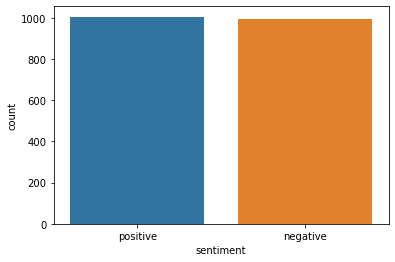

In [24]:
sns.countplot(train_data_df['sentiment'])

## Plotting Testing Data

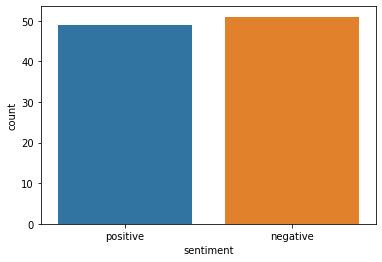

In [26]:
sns.countplot(test_data_df['sentiment'])

## Training

In [27]:
classifier = NaiveBayesClassifier(train_data)

## Testing

In [36]:
test_sentence = "wonderful little production filming technique well done"
result = classifier.classify(test_sentence)
proba = classifier.prob_classify(test_sentence)
print(result, round(proba.prob("positive"),2))

positive 0.56


In [38]:
test_sentence = "The acting is so horrible"
result = classifier.classify(test_sentence)
proba = classifier.prob_classify(test_sentence)
print(result, round(proba.prob("negative"),2))

negative 0.99


In [44]:
#classifier.accuracy(test_data)

In [45]:
classifier.show_informative_features(10) #method to display a listing of the most informative features. 

Most Informative Features
         contains(waste) = True           negati : positi =     17.2 : 1.0
   contains(brilliantly) = True           positi : negati =     14.2 : 1.0
         contains(hated) = True           negati : positi =     13.1 : 1.0
    contains(amateurish) = True           negati : positi =     11.1 : 1.0
        contains(crappy) = True           negati : positi =     10.4 : 1.0
    contains(whatsoever) = True           negati : positi =     10.3 : 1.0
        contains(asleep) = True           negati : positi =      9.8 : 1.0
         contains(blame) = True           negati : positi =      9.8 : 1.0
        contains(wasted) = True           negati : positi =      9.8 : 1.0
         contains(inept) = True           negati : positi =      9.1 : 1.0


## Simple Data Sample

In [40]:
train_data = [
    ('This is an excellent movie', 'positive'),
    ('The move was fantastic I like it', 'positive'),
    ('You should watch it, it is brilliant', 'positive'),
    ('Exceptionally good', 'positive'),
    ("Wonderfully directed and executed. I like it", 'positive'),
    ('It was very boring', 'negative'),
    ('I did not like the movie', 'negative'),
    ("The movie was horrible", 'negative'),
    ('I will not recommend', 'negative'),
    ('The acting is pathetic', 'negative')
]
test_data = [
    ('Its a fantastic series', 'positive'),
    ('Never watched such a brillent movie', 'positive'),
    ("horrible acting", 'negative'),
    ("It is a Wonderful movie", 'positive'),
    ('waste of money', 'negative'),
    ("pathetic picture", 'negative')
]